In [11]:
import os
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
col = ['k', 'b', 'r', 'g', 'tab:orange', 'm']
mar = ['o', '^', 'v', 's', 'D']

In [51]:
res_file = 'C:/Users/OlegKashurin/home/Work/Films/OxideFilms/R-PDM/Release/params.txt'

params = np.loadtxt(res_file, dtype='str', usecols=1)
Nx = int(params[1])
n_save = int(params[2])
phi_ext = float(params[3])
L = float(params[4])
T = float(params[5])

D_MV = float(params[6])
D_OV = float(params[7])

A_k = float(params[19])
A_D = float(params[20])
A_L = float(params[21])
Temp = float(params[22])
Ff = float(params[23])
e_0 = float(params[24])
R = float(params[25])

A_C = A_k*A_L/A_D
A_t = A_L**2/A_D
A_phi = R*Temp/Ff

h = L / (Nx-1)
x = h*np.arange(Nx)

Nt = round(2 * (D_MV + D_OV) * T / h**2) + 1
dt = T / (Nt-1)
N_data = (Nt-1) // n_save + 2
    
print(Nx, Nt, N_data)
print(L, x[-1], h)

501 200001 1002
5.0 5.0 0.01


In [52]:
path = 'C:/Users/OlegKashurin/home/Work/Films/OxideFilms/R-PDM/Release'

t_data = np.loadtxt(path+'/t_data.txt')
Data_C_MV = np.loadtxt(path+'/Data_C_MV.txt')
Data_C_OV = np.loadtxt(path+'/Data_C_OV.txt')
Data_phi = np.loadtxt(path+'/Data_phi.txt')
Data_E = np.loadtxt(path+'/Data_E.txt')
Data_k2 = np.loadtxt(path+'/Data_k2.txt')

# Visualisation

## General

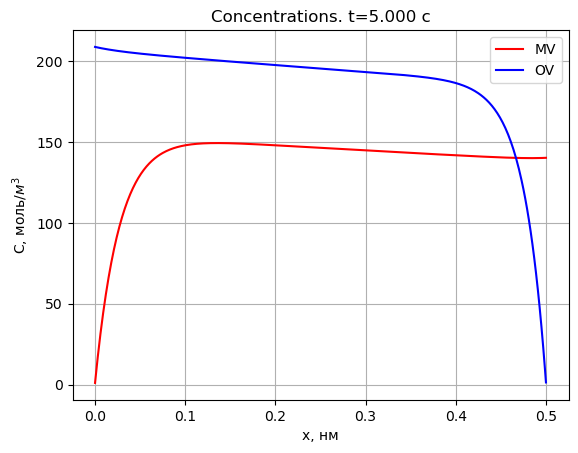

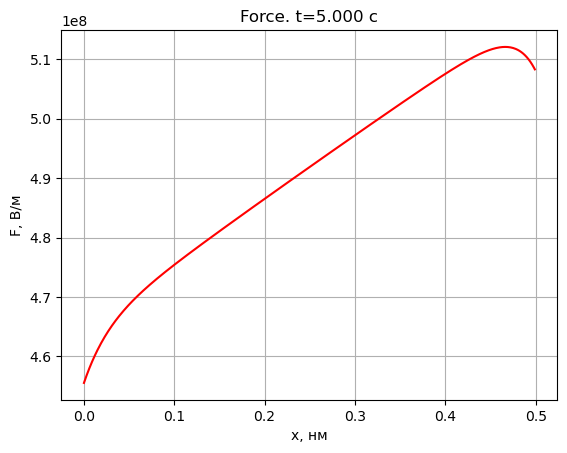

In [53]:
num = -1
plt.plot(x*0.1, Data_C_MV[num]*A_C, 'r', label='MV')
plt.plot(x*0.1, Data_C_OV[num]*A_C, 'b', label='OV')
plt.title(f'Concentrations. t={t_data[num]*A_t:.3f} c')
plt.legend()
plt.xlabel('x, нм')
plt.ylabel(r'C, моль/$м^{3}$')
plt.grid()
#plt.savefig(path+f'C({t[num]:.3f}).png', format='png', dpi=300)
plt.show()

plt.plot(x[:-1]*0.1, A_phi/A_L*Data_E[num], 'r', label='F')
plt.title(f'Force. t={t_data[num]*A_t:.3f} c')
plt.xlabel('x, нм')
plt.ylabel('F, В/м')
#plt.ylim([A_phi/A_L*F_min*0.95, A_phi/A_L*F_max*1.05])
plt.grid()
#plt.savefig(path+f'F({t[num]:.3f}).png', format='png', dpi=300)
plt.show()

7.6608615655


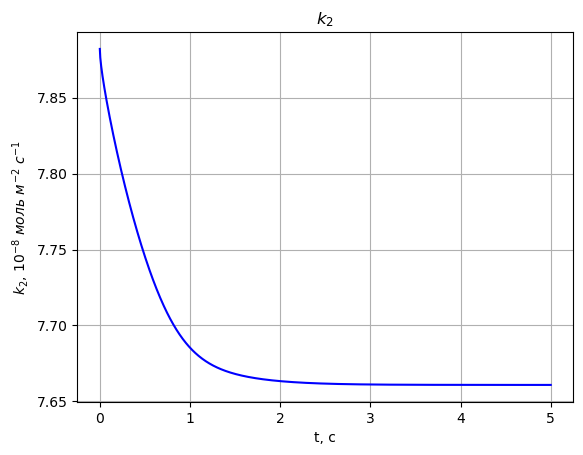

In [54]:
print(Data_k2[-1])

plt.plot(t_data, Data_k2, 'b')
plt.xlabel('t, c')
plt.title(r'$k_2$')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.grid()
#plt.savefig(path+f'k2.png', format='png', dpi=300)
plt.show()

In [55]:
x_cs = x[0:None]

cs_C_MV = CubicSpline(x, Data_C_MV[-1])
cs_C_OV = CubicSpline(x, Data_C_OV[-1])
cs_phi = CubicSpline(x, Data_phi[-1])

j_MV = - D_MV * (cs_C_MV.derivative(nu=1)(x_cs) - 2 * cs_phi.derivative(nu=1)(x_cs) * cs_C_MV(x_cs))
j_OV = - D_OV * (cs_C_OV.derivative(nu=1)(x_cs) + 2 * cs_phi.derivative(nu=1)(x_cs) * cs_C_OV(x_cs))

dj_MV = D_MV * (cs_C_MV.derivative(nu=2)(x_cs) - 
                2 * (cs_phi.derivative(nu=2)(x_cs) * cs_C_MV(x_cs) + 
                     cs_phi.derivative(nu=1)(x_cs) * cs_C_MV.derivative(nu=1)(x_cs)))

dj_OV = D_OV * (cs_C_OV.derivative(nu=2)(x_cs) + 
                2 * (cs_phi.derivative(nu=2)(x_cs) * cs_C_OV(x_cs) + 
                     cs_phi.derivative(nu=1)(x_cs) * cs_C_OV.derivative(nu=1)(x_cs)))

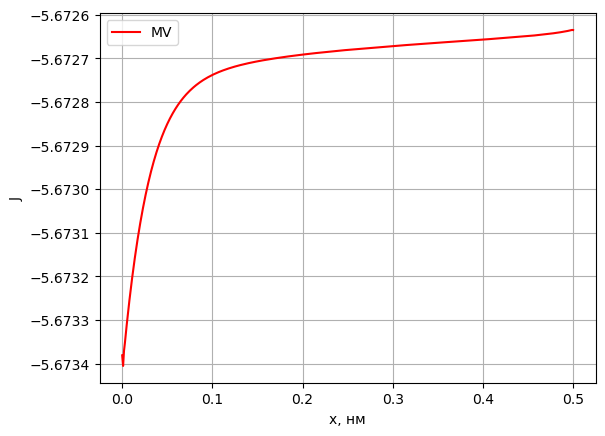

In [58]:
plt.plot(x_cs*0.1, j_MV, 'r', label='MV')
#plt.plot(x_cs*0.1, j_OV, 'b', label='OV')
#plt.plot(x_cs*0.1, j_OV + j_MV, 'b', label='OV')

plt.legend()
plt.xlabel('x, нм')
plt.ylabel('J')
plt.grid()
#plt.savefig(f'J_{id}.png', format='png', dpi=300)
plt.show()

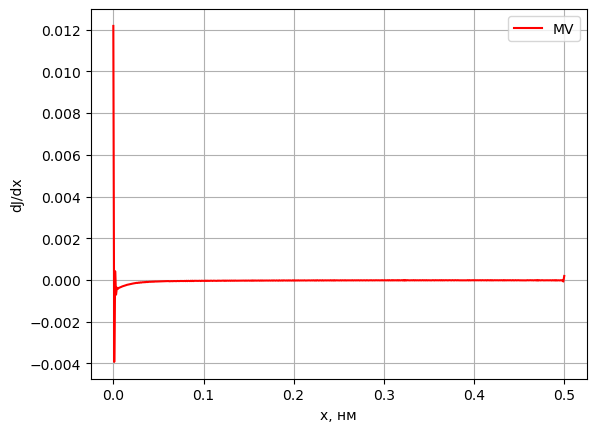

In [59]:
plt.plot(x_cs*0.1, dj_MV, 'r', label='MV')
#plt.plot(x_cs*0.1, dj_OV, 'b', label='OV')
plt.legend()
plt.xlabel('x, нм')
plt.ylabel('dJ/dx')
plt.grid()
#plt.savefig(f'dJ_{id}.png', format='png', dpi=300)
plt.show()

##       $k_2$ plot

## Concentrarion gifs

In [ ]:
# Concentrarion gifs
Nt_gif = min(4000, Ndata)

C_max = max(np.max(Data_C_MV[:Nt_gif, :]), np.max(Data_C_OV[:Nt_gif, :]))
def update_plot(num):
    plt.cla()
    plt.plot(x*0.1, Data_C_MV[num]*A_c, 'r', label='MV')
    plt.plot(x*0.1, Data_C_OV[num]*A_c, 'b', label='OV')
    plt.title(f'Concentrations. t={t_data[num]*A_t:.3f} c')
    plt.legend()
    plt.ylim([0, A_c * C_max*1.1])
    #plt.xlim([0, L*0.1])
    plt.xlabel('x, нм')
    plt.ylabel(r'C, моль/$м^{3}$')
    plt.grid()

fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
#ani.save(path+'C.gif', writer='pillow', fps=24)

## Potential gifs

In [ ]:
Nt_gif = min(4000, Ndata)

def update_plot(num):
    plt.cla()
    plt.plot(x*0.1, Data_phi[num]*A_phi, 'b')
    plt.title(f'Potential. t={t_data[num]*A_t:.3f} c')
    plt.xlabel('x, нм')
    plt.ylabel(r'$\phi$, В')
    plt.ylim([0, phi_ext*1.1*A_phi])
    plt.grid()
    
fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
#ani.save(path+f'phi.gif', fps=24)

## Electric field gif

In [ ]:
Nt_gif = min(4000, Ndata)

E_max = np.max(Data_E)
E_min = np.min(Data_E)
def update_plot(num):
    plt.cla()
    plt.plot(x[:-1]*0.1, A_phi/A_L*Data_E[num], 'r', label='F')
    plt.title(f'Electric field. t={t_data[num]*A_t:.3f} c')
    plt.xlabel('x, нм')
    plt.ylabel('E, В/м')
    plt.ylim([A_phi/A_L*E_min*0.95, A_phi/A_L*E_max*1.05])
    plt.grid()

fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
#ani.save(path+f'E.gif', fps=24)